In [47]:
%pylab inline
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


Populating the interactive namespace from numpy and matplotlib


In [2]:
document = pd.read_csv('FuelConsumption.csv')

In [3]:
document.head(100)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014,BMW,435i COUPE,COMPACT,3.0,6,M6,Z,11.8,7.9,10.0,28,230
96,2014,BMW,435i xDRIVE COUPE,COMPACT,3.0,6,A8,Z,11.7,7.8,9.9,29,228
97,2014,BMW,435i xDRIVE COUPE,COMPACT,3.0,6,M6,Z,11.9,8.3,10.3,27,237
98,2014,BMW,528i,MID-SIZE,2.0,4,A8,Z,10.2,7.0,8.8,32,202


In [4]:
#Print specific Columns
cdf = document[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(100)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
95,3.0,6,10.0,230
96,3.0,6,9.9,228
97,3.0,6,10.3,237
98,2.0,4,8.8,202


In [6]:
cdf1 = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
cdf1

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6
...,...,...,...,...
1062,6,3.0,271,11.8
1063,6,3.2,264,11.5
1064,6,3.0,271,11.8
1065,6,3.2,260,11.3


Text(0, 0.5, 'CO2 EMMISSIONS')

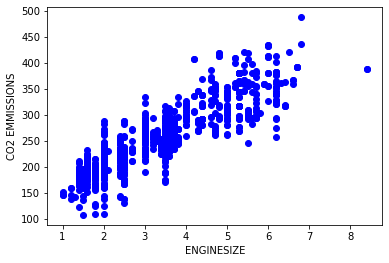

In [8]:
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'] , color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2 EMMISSIONS')

In [49]:
fraction = np.random.random(len(cdf)) < 0.8
train_data = cdf[fraction]
test_data = cdf[~fraction]

print(len(train_data) , len(test_data))

843 224


In [50]:
train_x = train_data[['ENGINESIZE']]
train_y = train_data[['CO2EMISSIONS']]

test_x = test_data[['ENGINESIZE']]
test_y = test_data[['CO2EMISSIONS']]

In [51]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
print(train_x_poly)

[[ 1.    2.    4.  ]
 [ 1.    2.4   5.76]
 [ 1.    1.5   2.25]
 ...
 [ 1.    3.    9.  ]
 [ 1.    3.2  10.24]
 [ 1.    3.2  10.24]]


In [52]:
regression = linear_model.LinearRegression()
regression.fit(train_x_poly , train_y)

LinearRegression()

In [53]:
print("Coefficients : " , regression.coef_[0])
print("Intercept : " , regression.intercept_[0])

Coefficients :  [ 0.         49.78378836 -1.46271949]
Intercept :  108.23943870665886


In [54]:

x = np.arange(0,10,0.1)
y = regression.intercept_[0] + regression.coef_[0][1]*(x) + regression.coef_[0][2]*(x**2)

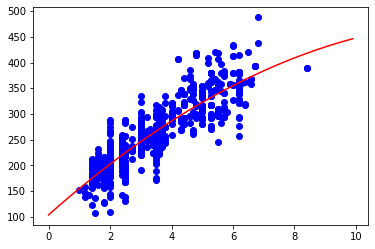

In [39]:
plt.scatter(train_x , train_y , color='blue')
plt.plot(x , y , color='red')

In [56]:
test_x_poly = poly.fit_transform(test_x)
test_y_expected = regression.predict(test_x_poly)
#Print Mean, Mean square, r2

print("Mean : " , np.mean((test_y_expected - test_y)))
print("Mean Square: " , np.mean((test_y_expected - test_y)**2))
print("R2 Score : " , r2_score(test_y_expected , test_y) )

Mean :  CO2EMISSIONS   -3.36585
dtype: float64
Mean Square:  CO2EMISSIONS    1090.957248
dtype: float64
R2 Score :  0.675930572301046
